<a href="https://colab.research.google.com/github/Whyugstiaan/tugas-ml/blob/main/UASMLDIMAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Load dataset & Eksplorasi Data

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [32]:
# Load dataset CSV
df = pd.read_csv('iris.csv')

# Tampilkan 5 data pertama
df.head(8)


,150,4,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0


Menampilkan informasi dataset

In [16]:
print("Jumlah data (baris):", df.shape[0])
print("Jumlah fitur (kolom):", df.shape[1] - 1)  # dikurangi target


Jumlah data (baris): 150
Jumlah fitur (kolom): 4


In [17]:
print("Nama fitur:")
print(df.columns)


Nama fitur:
Index(['150', '4', 'setosa', 'versicolor', 'virginica'], dtype='object')


Distribusi kelas target

In [19]:
print("Distribusi kelas target:")
print(df['virginica'].value_counts())

Distribusi kelas target:
virginica
0    50
1    50
2    50
Name: count, dtype: int64


Visualisasi distribusi target

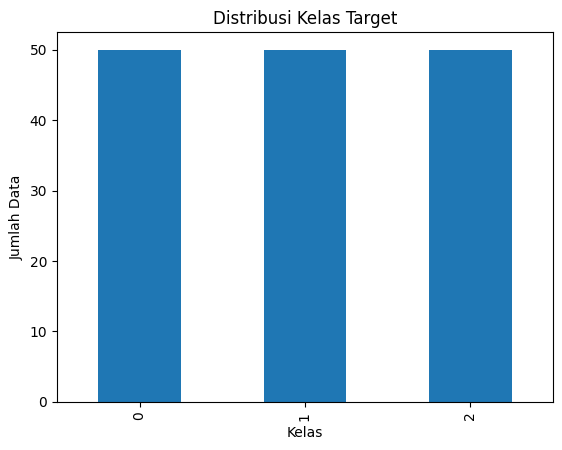

In [21]:
df['virginica'].value_counts().plot(kind='bar')
plt.title("Distribusi Kelas Target")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.show()

#2. Preprocessing

Memisahkan fitur dan target

In [23]:
X = df.drop('virginica', axis=1)
y = df['virginica']

Membagi data training (70%) dan testing (30%)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Data training:", X_train.shape)
print("Data testing:", X_test.shape)


Data training: (105, 4)
Data testing: (45, 4)


Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#3.KNN

Implementasi KNN (k = 5)Implementasi KNN (k = 5)

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)


Training model & prediksi

In [27]:
# Train model
knn.fit(X_train_scaled, y_train)

# Prediksi data test
y_pred = knn.predict(X_test_scaled)


Evaluasi Model

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)


Accuracy : 0.9111111111111111
Precision: 0.9298245614035089
Recall   : 0.9111111111111111
F1-score : 0.9095022624434389


Detail classification report

In [29]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.79      1.00      0.88        15
           2       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45

